In [1]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import pickle
import pandas as pd
import numpy as np
import re
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [ ]:
tfidf = pickle.load(open("../tfidf_model_negative.pickle", "rb")) 

In [4]:
data = pd.read_pickle("../sentiment140_tokenized.pickle")

In [11]:
data

,target,twitter_id,date,flag,user,text,tokenized_text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...","[switchfoot, awww, bummer, you, shoulda, got, ..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,"[upset, he, ca, update, his, facebook, texting..."
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,"[kenichan, i, dived, many, times, ball, manage..."
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,"[my, whole, body, feels, itchy, like, its, fire]"
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....","[nationwideclass, it, behaving, i, mad, i, i, ..."
...,...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...,"[woke, school, best, feeling, ever]"
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...,"[cool, hear, old, walt, interviews]"
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...,"[are, you, ready, your, mojo, makeover, ask, m..."
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...,"[happy, 38th, birthday, my, boo, alll, time, t..."


In [5]:
sentiment_data = pd.read_csv('../sentiment_tweets3.csv')
sentiment_data.drop('Unnamed: 0', axis=1, inplace = True)

In [6]:
sentiment_data

,message,label
0,just had a real good moment. i missssssssss hi...,0
1,is reading manga http://plurk.com/p/mzp1e,0
2,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,@lapcat Need to send 'em to my accountant tomo...,0
4,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0
...,...,...
10309,No Depression by G Herbo is my mood from now o...,1
10310,What do you do when depression succumbs the br...,1
10311,Ketamine Nasal Spray Shows Promise Against Dep...,1
10312,dont mistake a bad day with depression! everyo...,1


In [ ]:
for i in sentiment_data[sentiment_data['label']==1]['message']:
    for j in data['text']:
        if i==j:
            print(j)
            break

No post exist in the sentiment 140 from the additional depressed posts taken from https://github.com/viritaromero/Detecting-Depression-in-Tweets

In [7]:
words_of_interest = ['depressed', 'depression', 'stress', 'help'
                     'suicide', 'devastated', 'frustrated',
                    "upsetting", "distressing", "painful", "heartbreaking", 
                     "dispiriting", "disheartening", "discouraging", "demoralizing"]

def search_word(data, words):
    for each_word in words:
        if re.search(each_word, data):
            return 1
    return 0

In [8]:
data['count'] = data['text'].apply(lambda x: search_word(x, words_of_interest))
index_depressed = data[data['count']==1].index
check_depressed = data.loc[list(index_depressed), :]

In [9]:
len_post = check_depressed.shape[0]
print(f'Potential depressing post in sentiment 140 negative: {len_post}')

Potential depressing post in sentiment 140 negative: 6293


In [10]:
check_depressed = check_depressed[['target', 'text']]
check_depressed = check_depressed.loc[check_depressed['target']==0]
# get only the real depressed post
depressed_sentiment = sentiment_data[sentiment_data['label']==1]
depressed_sentiment.columns = ['text', 'target']
depressed_sentiment = depressed_sentiment.loc[:, ['target', 'text']]

In [11]:
depressed_sentiment.head()

,target,text
8000,1,The lack of this understanding is a small but ...
8001,1,i just told my parents about my depression and...
8002,1,depression is something i don't speak about ev...
8003,1,Made myself a tortilla filled with pb&j. My de...
8004,1,@WorldofOutlaws I am gonna need depression med...


In [12]:
check_depressed.head()

,target,text
29,0,Meh... Almost Lover is the exception... this t...
79,0,wonders why someone that u like so much can ma...
433,0,Is stressing out because my blackberry keeps f...
629,0,"i should be sleeping, i have a stressed out we..."
659,0,@gigdiary I know - was a little depressed tha...


In [13]:
check_depressed = pd.concat([check_depressed, depressed_sentiment])

In [14]:
check_depressed.drop(labels=10313, inplace = True)

In [15]:
check_depressed

,target,text
29,0,Meh... Almost Lover is the exception... this t...
79,0,wonders why someone that u like so much can ma...
433,0,Is stressing out because my blackberry keeps f...
629,0,"i should be sleeping, i have a stressed out we..."
659,0,@gigdiary I know - was a little depressed tha...
...,...,...
10308,1,Many sufferers of depression aren't sad; they ...
10309,1,No Depression by G Herbo is my mood from now o...
10310,1,What do you do when depression succumbs the br...
10311,1,Ketamine Nasal Spray Shows Promise Against Dep...


Here, concatenate the real depressed twitter post with the potential depressed post from sentiment 140. The potential depressed post was taken using target word inspection, which can be seen from the variable word_of_interests.

The way to check whether some post in the sentiment may contain depressed post is to use LDA and see the topic word distribution of 2 groups. Then see the LDA topic allocation performance by inspection.

#### Tfidf should not be used for LDA, as LDA use multinomial distribution

In [140]:
corpus = list(check_depressed['text'])
vectorizer = TfidfVectorizer(stop_words = "english", max_df=0.9, min_df=5, token_pattern=u'(?ui)\\b\\w*[a-z]+\\w*\\b')
dtm = vectorizer.fit_transform(corpus)

#### Use Countvectorizer instead

In [16]:
corpus = list(check_depressed['text'])
# min df means the word should at least shows up in n documents
# here, \b \b means the before and after the [a-zA-Z]{3, 7} should be a character with length of zero, such as space.
# {3, 7} means taking the word of length 3 to 7
vectorizer = CountVectorizer(lowercase = True, stop_words = "english", max_df=0.9, min_df=5, 
                             token_pattern=r'\b[a-zA-Z]{4,15}\b')
dtm = vectorizer.fit_transform(corpus)

#### Just want to separate depressed and non depressed post

In [17]:
LDA = LatentDirichletAllocation(n_components= 2, random_state=42)

In [18]:
# fit
LDA.fit(dtm)

# components
# here, each component will consist of a probability for each word in the topic
LDA.components_

array([[ 5.46798996, 38.90013286, 10.62119839, ...,  0.51943048,
         0.50454353,  0.54399355],
       [ 0.53201004,  3.09986714,  2.37880161, ...,  8.48056952,
        27.49545647, 44.45600645]])

In [19]:
dic_top_20_words = {}
all_components = LDA.components_

for each_topic in range(len(LDA.components_)):
    # get the top 20 words with the highest probability for each document 
    key_name = f'topic_{each_topic}'
    # get all of the word index and append in dictionary
    indices = LDA.components_[each_topic].argsort()[-20:]
    dic_top_20_words[key_name] = [vectorizer.get_feature_names()[i] for i in indices]


In [20]:
def print_words(dic):
    for index, topic in enumerate(dic.keys()):
        print(f'Top 20 words in topic {index}')
        print(dic[topic])
        print('\n')

In [21]:
# display the top 20 words for each topic
print_words(dic_top_20_words)

Top 20 words in topic 0
['upsetting', 'stressing', 'good', 'want', 'know', 'right', 'stressful', 'feeling', 'going', 'like', 'feel', 'today', 'work', 'really', 'frustrated', 'stress', 'just', 'stressed', 'painful', 'depressed']


Top 20 words in topic 1
['heart', 'post', 'love', 'know', 'great', 'help', 'health', 'mental', 'just', 'status', 'like', 'life', 'people', 'face', 'http', 'emoji', 'anxiety', 'https', 'twitter', 'depression']




#### Test the model assignment using some of the depression text from the subreddit post

In [22]:
# dtm here is the fit transform of tfidf
# the result here will be the probability of each document in each topic
topic_results = LDA.transform(dtm)

In [155]:
topic_results

array([[0.51812672, 0.48187328],
       [0.88952756, 0.11047244],
       [0.71560376, 0.28439624],
       ...,
       [0.42233752, 0.57766248],
       [0.06287187, 0.93712813],
       [0.4987231 , 0.5012769 ]])

In [23]:
check_unsure_index = []
counter = 0
for each in topic_results:
    np.absolute(-2)
    if np.absolute(each[0]-each[1])<=0.1:
        check_unsure_index.append(counter)
    counter += 1

In [24]:
print(f'Number of unsure topic allocation: {len(check_unsure_index)}')

Number of unsure topic allocation: 400


In [25]:
topic_allocation = topic_results.argmax(axis=1)

In [26]:
check_depressed['LDA_allocation'] = topic_allocation

In [27]:
confident = [1]*check_depressed.shape[0]
for each_index in check_unsure_index:
    confident[each_index] = 0

In [28]:
check_depressed['confident'] = confident

In [29]:
check_depressed.head()

,target,text,LDA_allocation,confident
29,0,Meh... Almost Lover is the exception... this t...,0,0
79,0,wonders why someone that u like so much can ma...,0,1
433,0,Is stressing out because my blackberry keeps f...,0,1
629,0,"i should be sleeping, i have a stressed out we...",0,1
659,0,@gigdiary I know - was a little depressed tha...,0,1


In [30]:
real_depressed_check = check_depressed[check_depressed['target']==1]

In [31]:
real_depressed_check['LDA_allocation'].value_counts()

1    2062
0     251
Name: LDA_allocation, dtype: int64

Majority from the real depressed post are allocated in topic 2, which is can be seen that the word related to it is depression in terms of mental health issue, unlike topic 1 where the depressed here is due to work, which may be related to stress of work or school. For this reason, we may inspect the allocation of topic 2 in the sentiment cadidates.

In [32]:
topic_1_sentiment_140 = check_depressed.query('target == 0 and LDA_allocation == 1')
topic_0_sentiment_140 = check_depressed.query('target == 0 and LDA_allocation == 0')

In [34]:
topic_1_sentiment_140[topic_1_sentiment_140['confident']==1]

,target,text,LDA_allocation,confident
798,0,My stress always culminates with physical pain.,1,1
4285,0,@bekibutton Its very tough isn't it I'm virtua...,1,1
5868,0,@mistressmatisse That link isn't working http...,1,1
14375,0,Oh no.. post camp depression is kicking in,1,1
24364,0,I need a pot noodle. Random but true! Also i'm...,1,1
...,...,...,...,...
795425,0,heartbreaking..4-yr-old girl fighting cancer ...,1,1
795723,0,it's a lil disheartening to see everyone in th...,1,1
797259,0,Slesai sudah tanggung jawab gw d sma !!! Tngga...,1,1
798848,0,RIP Farrah Fawcett... a heartbreaking story......,1,1


In [35]:
additional_depressed_index = pd.DataFrame([])
additional_depressed_index['index_depressed'] = topic_1_sentiment_140[topic_1_sentiment_140['confident']==1].index

In [37]:
additional_depressed_index.to_csv('extra_depressed.csv')

#### Another method: Calculate the similarity of each post using cosine similarity?, first need to take the tf-idf from the depressed posts.

In [205]:
check_depressed

,target,text,LDA_allocation,confident
29,0,Meh... Almost Lover is the exception... this t...,0,0
79,0,wonders why someone that u like so much can ma...,0,1
433,0,Is stressing out because my blackberry keeps f...,0,1
629,0,"i should be sleeping, i have a stressed out we...",0,1
659,0,@gigdiary I know - was a little depressed tha...,0,1
...,...,...,...,...
10308,1,Many sufferers of depression aren't sad; they ...,1,1
10309,1,No Depression by G Herbo is my mood from now o...,1,1
10310,1,What do you do when depression succumbs the br...,1,1
10311,1,Ketamine Nasal Spray Shows Promise Against Dep...,1,1


In [238]:
corpus = list(check_depressed[check_depressed['target']==1]['text'])
vectorizer = TfidfVectorizer(stop_words = "english", max_df=0.9, min_df=5, token_pattern=u'(?ui)\\b\\w*[a-z]+\\w*\\b')
vectorizer.fit(corpus)
dtm = vectorizer.transform(list(check_depressed[check_depressed['target']==0]['text']))

In [231]:
[check_depressed.loc[8000, 'text']]

["The lack of this understanding is a small but significant part of what causes anxiety & depression to both feel so incredibly lonely. It's soooo easy to compare. It's so easy to invalidate ourselves because of that."]

In [221]:
depressed_post_benchmark = vectorizer.transform([check_depressed.loc[8000, 'text']])

In [235]:
from sklearn.metrics.pairwise import cosine_similarity
index_lst = []
for index, each_post in enumerate(dtm):
    if cosine_similarity(depressed_post_benchmark, dtm[index])>0.6:
        index_lst.append(index)

In [236]:
index_lst

[]

By using cosine similarity, it appears none of the post from negative sentiment are closely related to the real depression post.

#### Display wordcloud

In [280]:
def fit_corpus(data):
    corpus = data
    vectorizer = CountVectorizer(lowercase = True, stop_words = "english", max_df=0.9, min_df=5, 
                                 token_pattern=r'\b[a-zA-Z]{4,15}\b')
    vectorizer.fit(corpus)
    return vectorizer

def get_word_freq(data, vectorizer):
    all_words = []
    for sentence in list(check_depressed[check_depressed['target']==1]['text']):
        for word in sentence.split():
            if word in vectorizer.get_feature_names():
                all_words.extend([word])
    return Counter(all_words)

def generate_wc(data):
    wc = WordCloud(
        background_color="white",
        max_words=50,
        width = 1024,
        height = 720
    )

    wc = wc.generate_from_frequencies(freq_words)

    plt.figure()
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()


Real depressed post

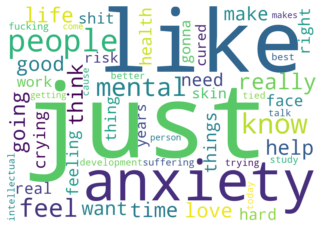

In [281]:
data = list(check_depressed[check_depressed['target']==1]['text'])
vectorizer = fit_corpus(data)
freq_words = get_word_freq(data, vectorizer)
generate_wc(data)

Negative sentiment post with "depression" word in it

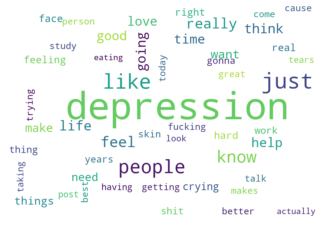

In [283]:
data = list(topic_0_sentiment_140['text'])
vectorizer = fit_corpus(data)
freq_words = get_word_freq(data, vectorizer)
generate_wc(data)

Full Negative sentiment 140

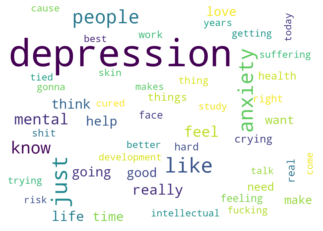

In [287]:
data = list(data[data['target']==0]['text'])
vectorizer = fit_corpus(data)
freq_words = get_word_freq(data, vectorizer)
generate_wc(data)

As seen from the wordcloud above, the main difference between the real depressed post and negative sentiment is the word "meantal", "health", "cured". Real depressed post may talk about depression as mental health issue. It can be seen that we manage to extract posts that have some word for mental and anxiety from the full negative sentiment and separate them to the real depressed post.